In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt



In [30]:
import os

# Define the absolute path to the image directory
image_dir = os.path.abspath('images')

# Verify if the directory exists and contains images for each class
if not os.path.exists(image_dir):
    print(f"Directory {image_dir} does not exist.")
else:
    classes = ['N', 'L', 'R', 'A', 'V']  # List of class names
    for class_name in classes:
        class_path = os.path.join(image_dir, class_name)
        if not os.path.exists(class_path):
            print(f"No images found for class {class_name}.")
        else:
            class_images = [f for f in os.listdir(class_path) if f.startswith('scalogram')]
            print(f"Found {len(class_images)} images for class {class_name}.")


Found 10000 images for class N.
Found 7000 images for class L.
Found 7000 images for class R.
Found 5000 images for class A.
Found 7000 images for class V.


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
img_height, img_width = 227, 227

# Create an ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)


In [32]:
# Load training data
train_data = datagen.flow_from_directory(
    image_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)


Found 28800 images belonging to 5 classes.


In [33]:
# Load validation data
validation_data = datagen.flow_from_directory(
    image_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 7200 images belonging to 5 classes.


In [34]:
# Print summary
print("Summary:")
print(f"Training samples: {train_data.samples}")
print(f"Validation samples: {validation_data.samples}")


Summary:
Training samples: 28800
Validation samples: 7200


In [36]:
# Define directory containing all images
data_dir = r"D:\6th SEM\mini project\images"

# Define image size and batch size
img_height, img_width = 227, 227
batch_size = 64


In [37]:
# Create ImageDataGenerator instance with rescaling
datagen = ImageDataGenerator(rescale=1.0/255)


In [38]:
# Create data generator
generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True  # Shuffle the data
)


Found 36000 images belonging to 5 classes.


In [39]:
# Calculate number of training and validation samples
total_samples = generator.samples
train_samples = int(0.8 * total_samples)  # 80% for training
val_samples = total_samples - train_samples  # 20% for validation


In [40]:
# Split the generator into training and validation sets
train_generator = tf.data.Dataset.from_generator(
    lambda: generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, img_height, img_width, 3], [None, 5])  
).take(train_samples).batch(batch_size)

validation_generator = tf.data.Dataset.from_generator(
    lambda: generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, img_height, img_width, 3], [None, 5])  
).skip(train_samples).batch(batch_size)


In [41]:
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)


In [42]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 28800 images belonging to 5 classes.
Found 7200 images belonging to 5 classes.


In [43]:
def create_alexnet_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2),
        tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2),
        tf.keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(5, activation='softmax')  # 5 classes
    ])
    return model


In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the weights of the best epoch
)


In [45]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Add the early stopping callback
)


Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 715s 2s/step - accuracy: 0.7755 - loss: 0.6069 - val_accuracy: 0.9557 - val_loss: 0.1481
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 583s 1s/step - accuracy: 0.9561 - loss: 0.1389 - val_accuracy: 0.9593 - val_loss: 0.1288
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 627s 1s/step - accuracy: 0.9620 - loss: 0.1173 - val_accuracy: 0.9664 - val_loss: 0.1073
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 649s 1s/step - accuracy: 0.9714 - loss: 0.0880 - val_accuracy: 0.9731 - val_loss: 0.0809
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 626s 1s/step - accuracy: 0.9739 - loss: 0.0801 - val_accuracy: 0.9740 - val_loss: 0.0963
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 638s 1s/step - accuracy: 0.9754 - loss: 0.0739 - val_accuracy: 0.9726 - val_loss: 0.0842
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 612s 1s/step - accuracy: 0.9805 - loss: 0.0602 - val_accuracy: 0.9683 - val_loss: 0.1501


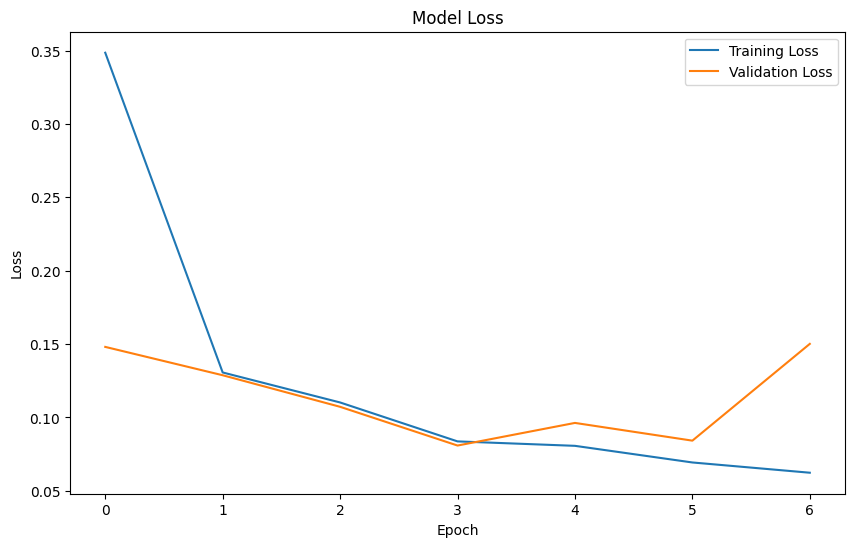

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


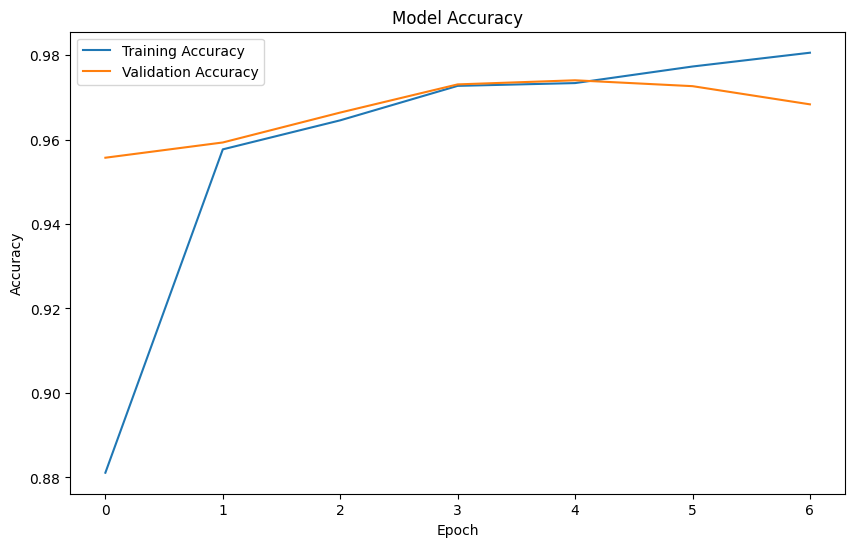

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [51]:
# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(validation_data)
print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")


c:\Users\ghana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 179ms/step - accuracy: 0.9711 - loss: 0.0833
Validation Loss: 0.08099652081727982
Validation Accuracy: 0.9730555415153503


Evaluating model on test data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 1.0000 - loss: 0.0075
Test Accuracy: 100.00%
Test Loss: 0.0075
Making predictions on test data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


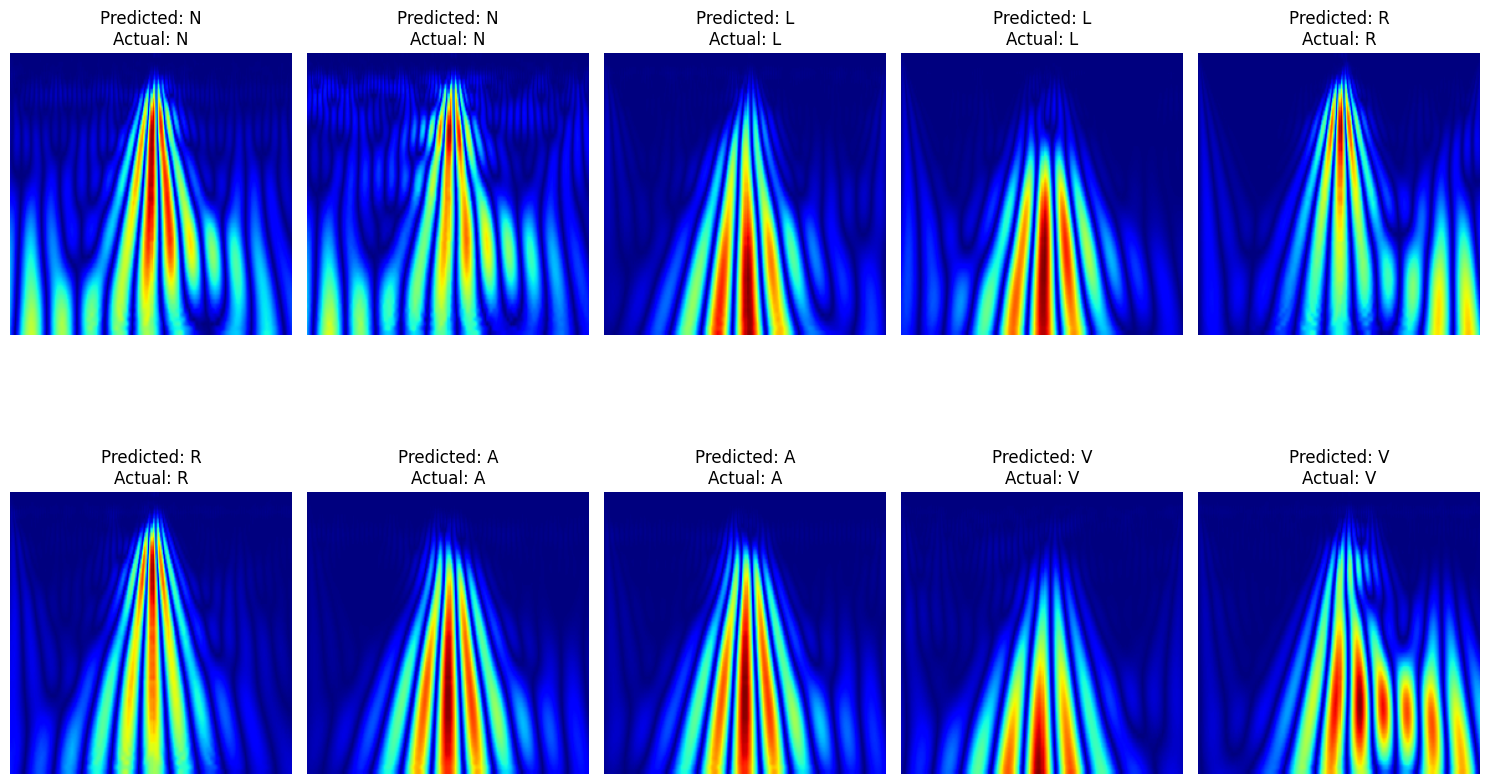

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you want to test on a random subset of validation data
num_samples_per_class = 2  # Number of samples per class to test
classes = ['N', 'L', 'R', 'A', 'V']  # Class names

# Prepare lists to store test data and labels
test_data = []
test_labels = []

# Track number of samples per class
samples_count = {class_name: 0 for class_name in classes}

# Loop to accumulate batches from validation_generator
while any(count < num_samples_per_class for count in samples_count.values()):
    batch_data, batch_labels = next(validation_generator)
    for i in range(len(batch_labels)):
        class_label = np.argmax(batch_labels[i])
        if samples_count[classes[class_label]] < num_samples_per_class:
            test_data.append(batch_data[i])
            test_labels.append(batch_labels[i])
            samples_count[classes[class_label]] += 1

# Convert lists to numpy arrays
test_data = np.array(test_data)
test_labels = np.array(test_labels)

# Evaluate the model on the test data
print("Evaluating model on test data...")
test_loss, test_accuracy = model.evaluate(test_data, test_labels, batch_size=batch_size)

print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions on the test data
print("Making predictions on test data...")
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate number of rows and columns for subplots
num_classes = len(classes)
num_rows = num_samples_per_class
num_cols = num_classes

# Plot images with predictions
plt.figure(figsize=(15, 10))
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_data[i])
    plt.title(f"Predicted: {classes[predicted_classes[i]]}\nActual: {classes[np.argmax(test_labels[i])]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Optionally, print predictions if needed
# for i in range(len(test_data)):
#     print(f"Sample {i+1}: Predicted class: {classes[predicted_classes[i]]}, Actual class: {classes[np.argmax(test_labels[i])]}")


In [53]:
# Save the model to a file
model.save('alexnet_model.h5')
print("Model saved to 'alexnet_model.h5'")


Model saved to 'alexnet_model.h5'


In [54]:
# Load the model from the file
loaded_model = tf.keras.models.load_model('alexnet_model.h5')
print("Model loaded successfully.")


Model loaded successfully.
